In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential , Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D


In [19]:
imagesize = 256
batchsize = 32
epoch = 50

In [20]:
dataset = tf.keras.utils.image_dataset_from_directory(
    'PlantVillage',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batchsize,
    image_size=(imagesize,imagesize),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 2152 files belonging to 3 classes.


In [21]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [22]:
len(dataset)
# this shows the the number of batches that have been created by tf.data.Datasets

68

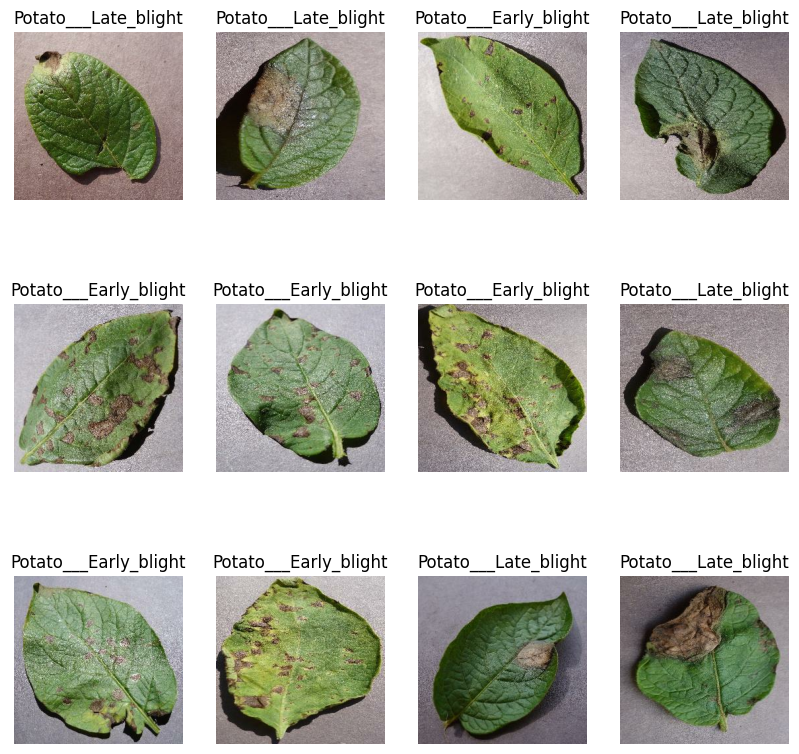

In [23]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        # print(image_batch.shape)
        # print(image_batch[0].numpy())
        # print(label_batch.numpy())
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [24]:
def get_dataset_partitions(dataset, train_size = 0.8, val_size = 0.1,shuffle = True, shuffle_size = 10000):
    if shuffle:
       dataset = dataset.shuffle(shuffle_size, seed=12)
       
    train_data = int(len(dataset)*train_size)
    train_ds=dataset.take(train_data)
    
    test_ds= dataset.skip(train_data)
    
    val_data = int(len(dataset)*val_size)
    val_ds= dataset.take(val_data)
    
    test_ds= test_ds.skip(val_data)
    
    return train_ds, val_ds, test_ds



    


In [25]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [26]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE )
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE )

In [29]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.experimental.preprocessing.Resizing(imagesize, imagesize)
])

In [30]:
data_augmentation = tf.keras.Sequential([
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2),
])

In [37]:
model = Sequential()

model.add(resize_rescale)
model.add(data_augmentation)
model.add(Conv2D(32, kernel_size=(3,3),strides=(1,1), padding='valid', activation='relu', input_shape= (imagesize,imagesize,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=1,padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1,padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1), padding='valid', activation='relu', input_shape= (imagesize,imagesize,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=1,padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1,padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1), padding='valid', activation='relu', input_shape= (imagesize,imagesize,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=1,padding='valid'))
model.add(Conv2D(16, kernel_size=(3,3),strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1,padding='valid'))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [38]:
model.build(input_shape = (batchsize,imagesize,imagesize,3))

In [39]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   multiple                  0         
                                                                 
 sequential_4 (Sequential)   (256, 256, 3)             0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 253, 253, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 251, 251, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (32, 250, 250, 64)       0         
 g2D)                                                 

In [40]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [42]:
history = model.fit(train_ds,
                    epochs = 50,
                    batch_size = batchsize,
                    verbose = 1,
                    validation_data = val_ds,
                    )

Epoch 1/50
